In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("crop_production.csv")
df[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [6]:
data = df.dropna()
print(data.shape)
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(242361, 7)
(3730, 6)


In [7]:
for i in data.columns:
    print("column name :",i)
    print("No. of column :",len(data[i].unique()))
    print(data[i].unique())

column name : State_Name
No. of column : 33
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
column name : District_Name
No. of column : 646
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG

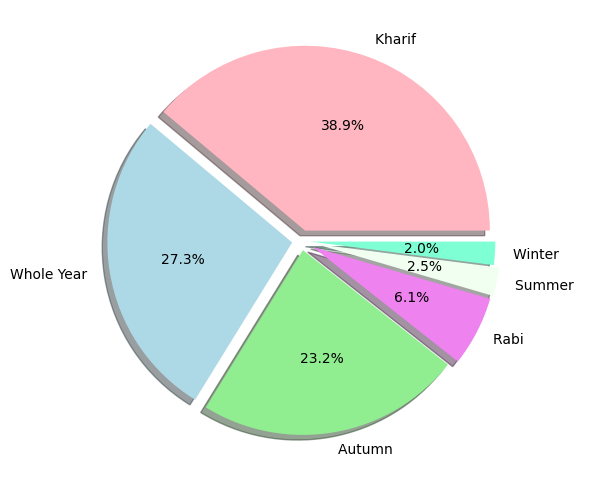

In [49]:
plt.figure(figsize = (6,6))
segment = data['Season'].value_counts()
segment_label = data['Season'].unique()
color = ('LightPink', "LightBlue" , 'LightGreen','Violet','honeydew','aquamarine')

plt.pie(segment,
       autopct = '%1.1f%%',
       labels = segment_label,
       explode = (0.06,0.05,0.05,0.07,0.08,0.05),
       shadow = True,
       colors = color);

C:\Users\kolla\AppData\Local\Temp\ipykernel_10088\3571185342.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=data,x="Crop_Year",aspect=3,kind='count',palette='viridis')


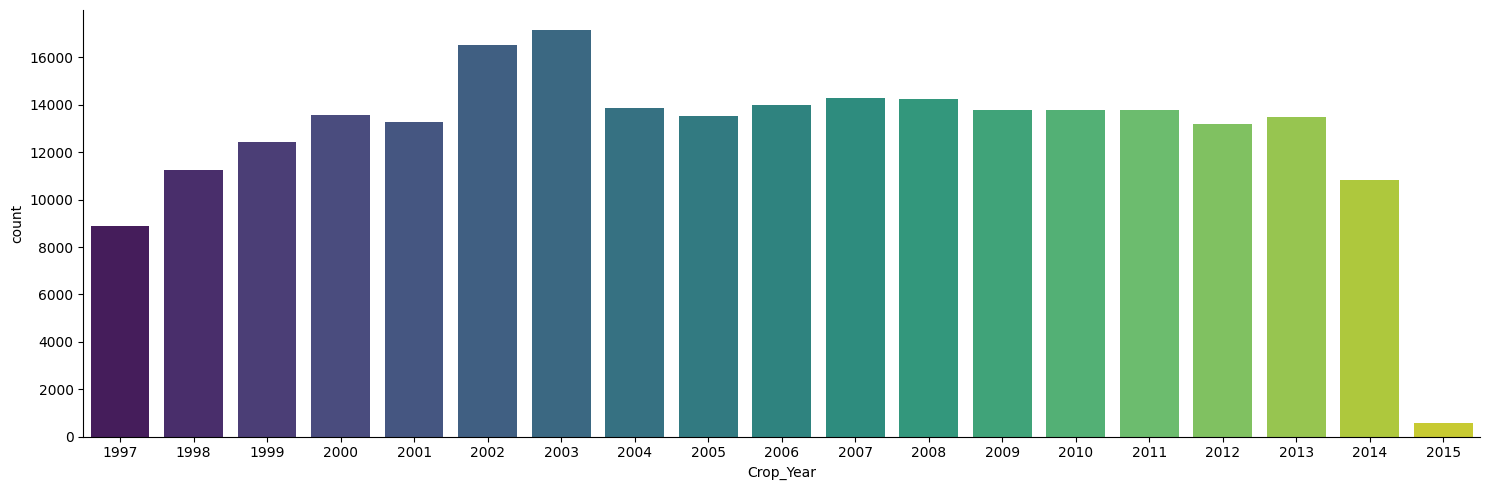

In [52]:
sns.catplot(data=data,x="Crop_Year",aspect=3,kind='count',palette='viridis')

C:\Users\kolla\AppData\Local\Temp\ipykernel_10088\2229005443.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=data.Crop, y=data.Production,errwidth=0)


Text(0.5, 1.0, 'Overall Crops vs Production')

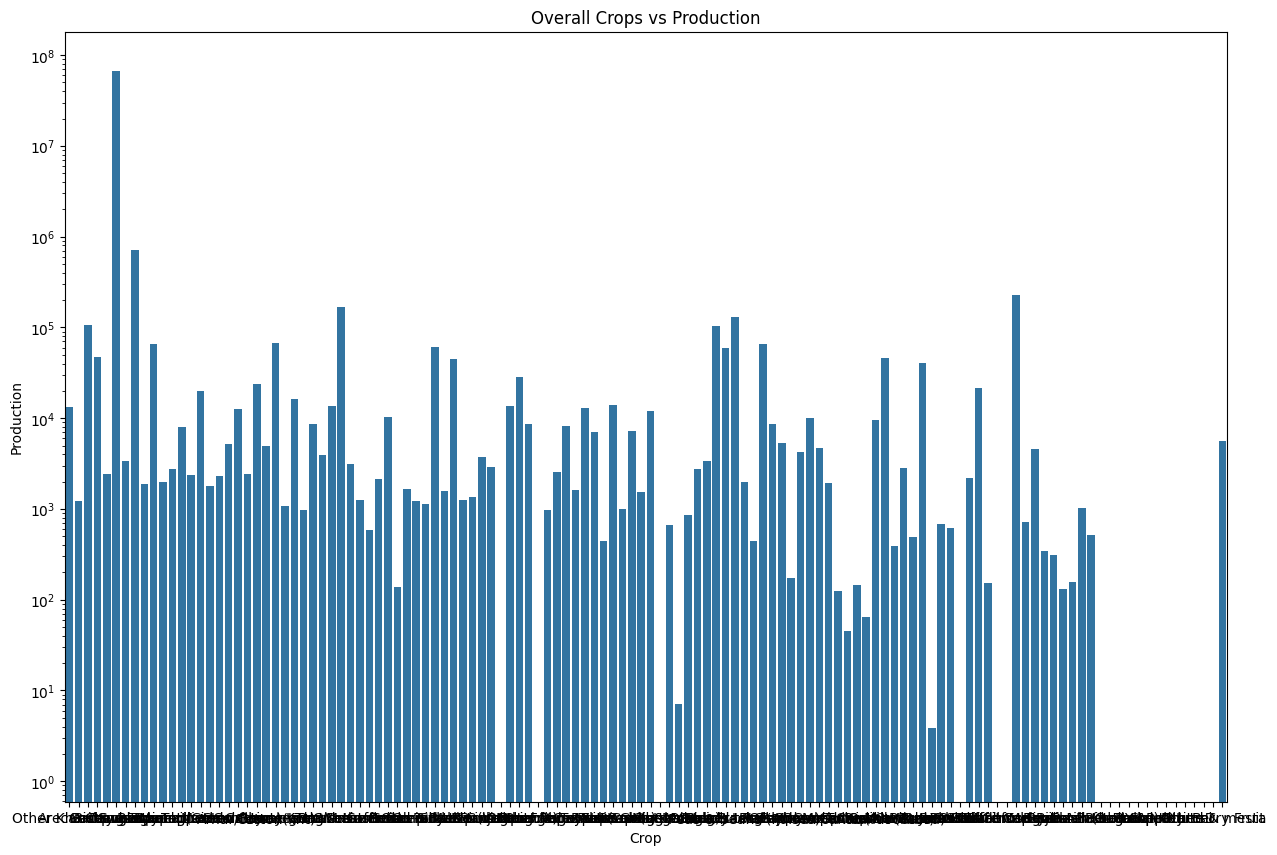

In [55]:
crop = data.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop 
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=data.Crop, y=data.Production,errwidth=0)
plt.yscale('log')
plt.title('Overall Crops vs Production')

<Axes: xlabel='Crop_Year'>

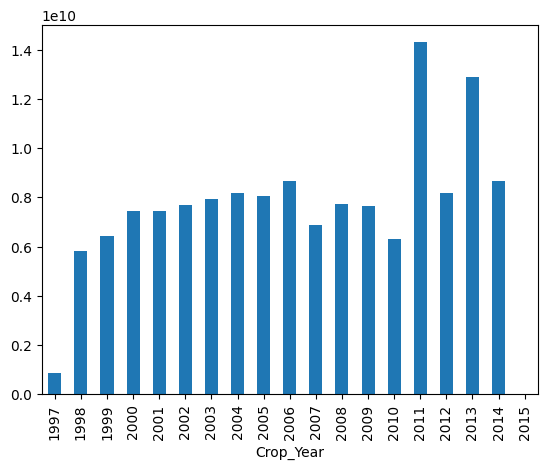

In [57]:
plt.tick_params(labelsize=10)
data.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

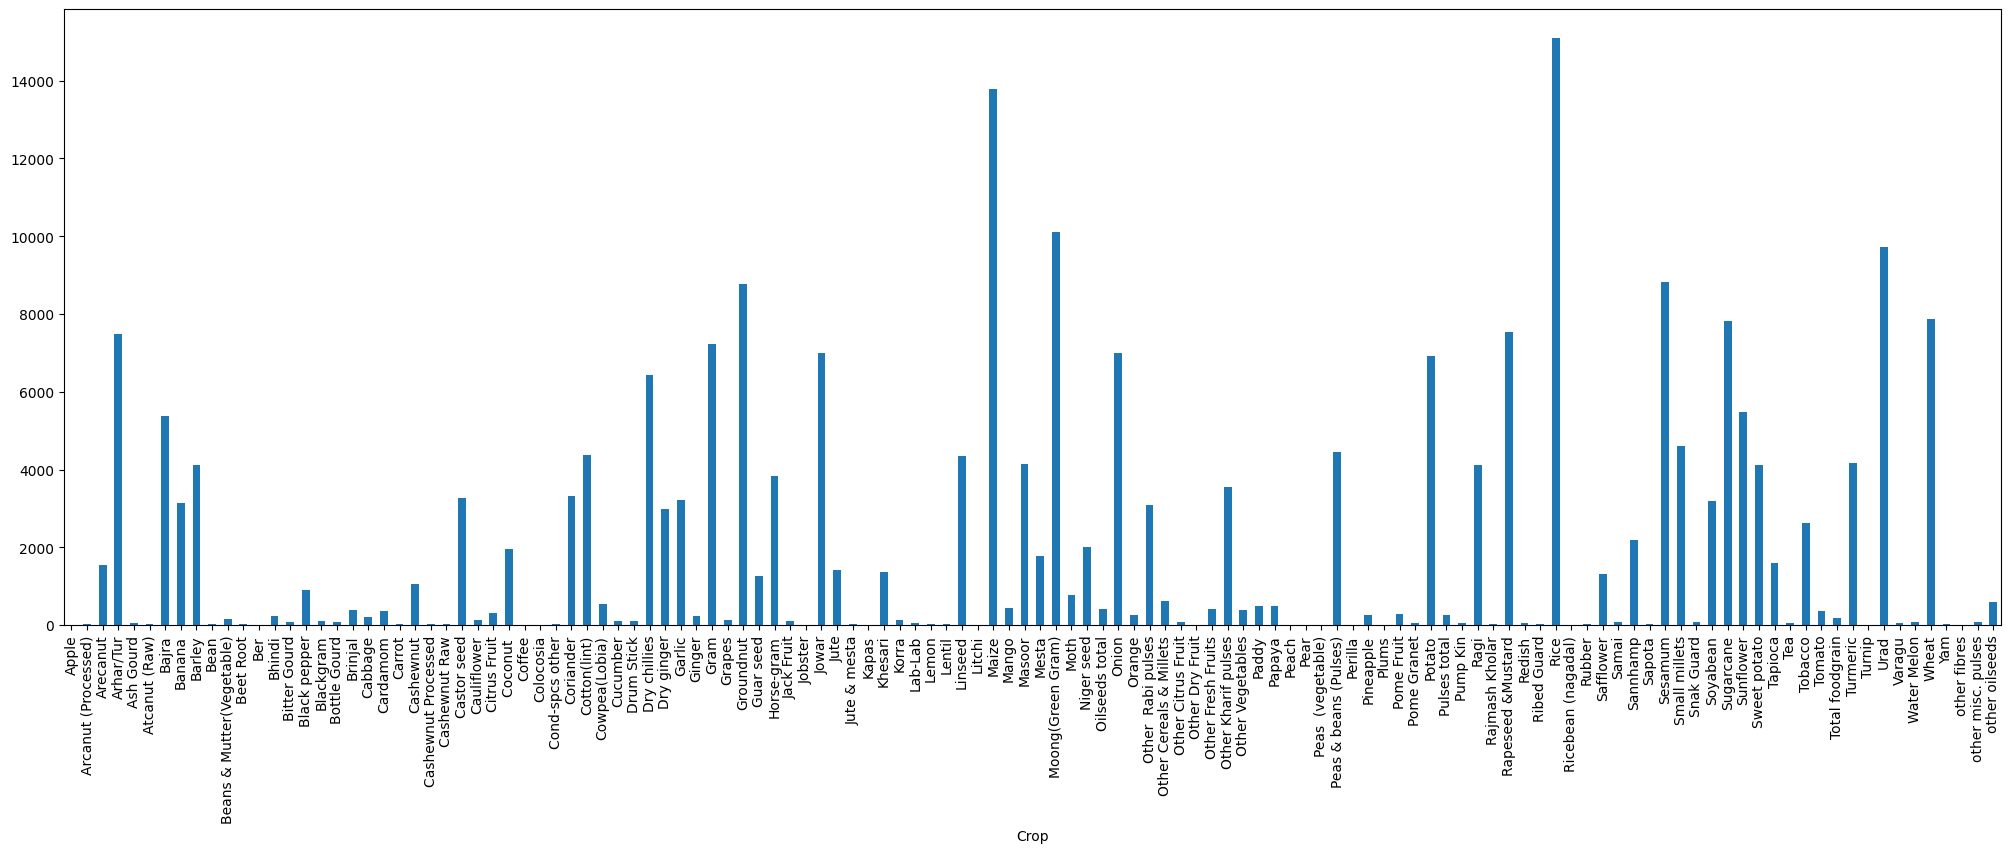

In [58]:
plt.figure(figsize=(25,8))
plt.tick_params(labelsize=10)
data.groupby("Crop")["Production"].agg("count").plot.bar()
plt.show()

In [ ]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

In [10]:
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


<Axes: xlabel='Crop_Year', ylabel='Production'>

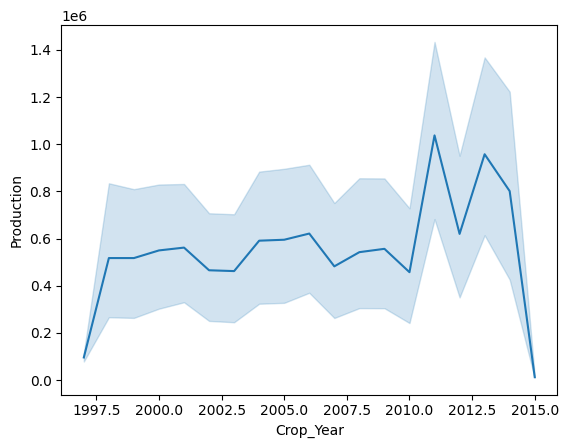

In [12]:
sns.lineplot(x='Crop_Year', y='Production', data=data)

C:\Users\kolla\AppData\Local\Temp\ipykernel_10088\767971401.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  crops_by_state = state_crop_prod.groupby('State_Name').apply(lambda x: squarify.normalize_sizes(x['Production'], 0, 100))


TypeError: unsupported operand type(s) for +: 'int' and 'list'

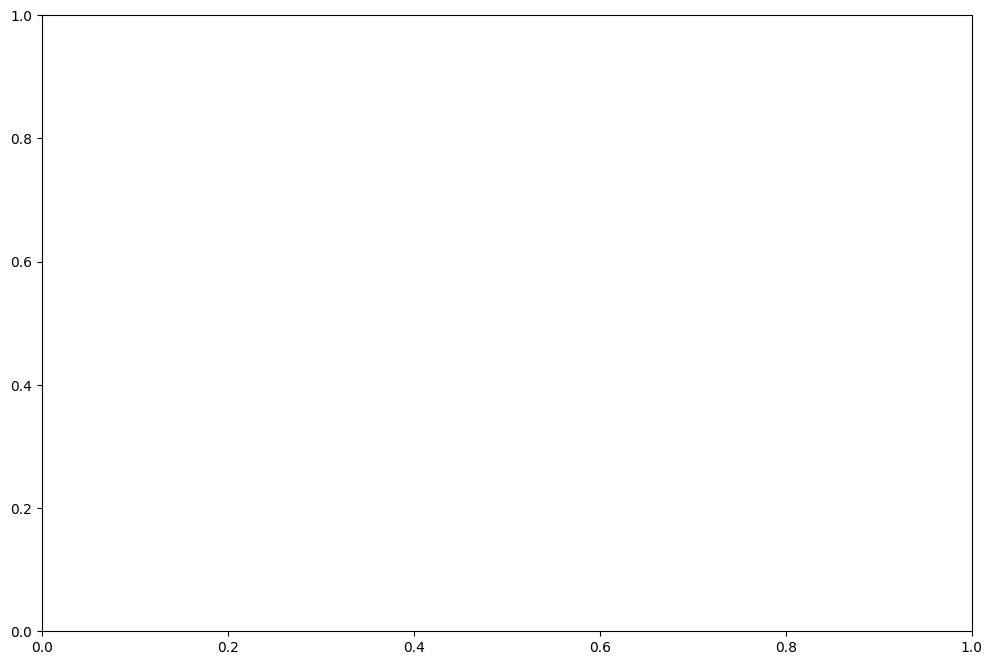

In [62]:
import squarify
plt.figure(figsize=(12, 8))
state_crop_prod = data.groupby(['State_Name', 'Crop'])['Production'].sum().reset_index()
crops_by_state = state_crop_prod.groupby('State_Name').apply(lambda x: squarify.normalize_sizes(x['Production'], 0, 100))
squarify.plot(sizes=crops_by_state, label=data['Crop'], color=plt.cm.Paired.colors)
plt.title('Crop Production Treemap by Crop and State')
plt.axis('off')
plt.show()


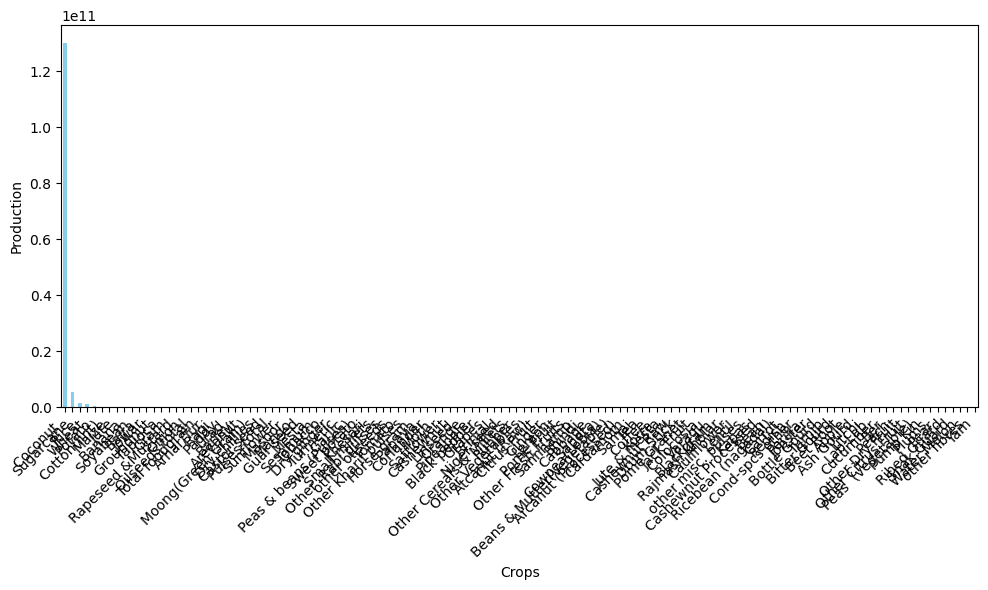

In [64]:
import matplotlib.pyplot as plt
crop_production = data.groupby('Crop')['Production'].sum().sort_values(ascending=False)

    # Create a plot for the state crop production data
plt.figure(figsize=(10, 6))
crop_production.plot(kind='bar', color='skyblue')
#plt.title(f"Crop Production in {state} ({year} - {season})")
plt.xlabel('Crops')
plt.ylabel('Production')
plt.xticks(rotation=45, ha='right')

# Save the plot to the specified path
plt.tight_layout()
plt.show()
#plt.savefig(chart_path)
plt.close()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),

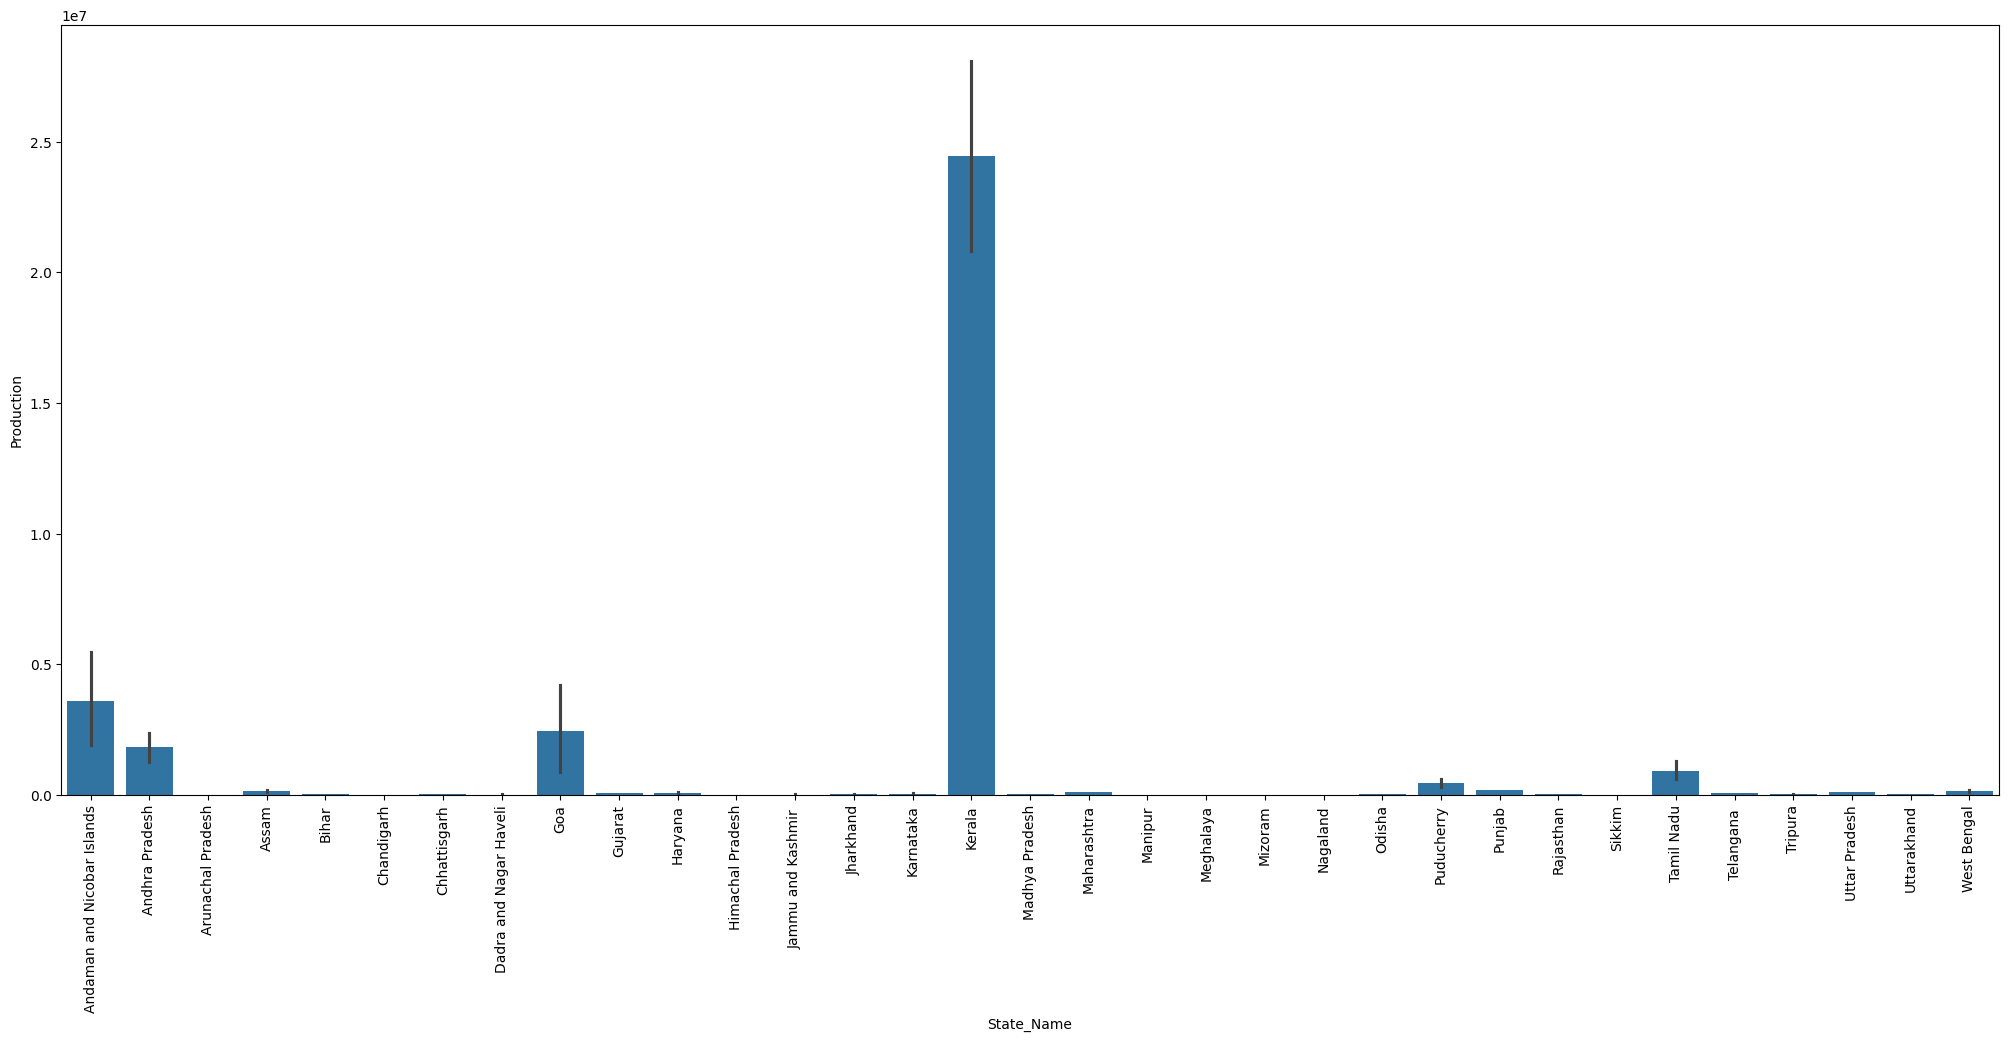

In [15]:
plt.figure(figsize=(25,10))
sns.barplot(x="State_Name",y="Production",data=data)
plt.xticks(rotation=90)


C:\Users\kolla\AppData\Local\Temp\ipykernel_10088\3596380955.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Production', data=data,palette='twilight')


<Axes: xlabel='Season', ylabel='Production'>

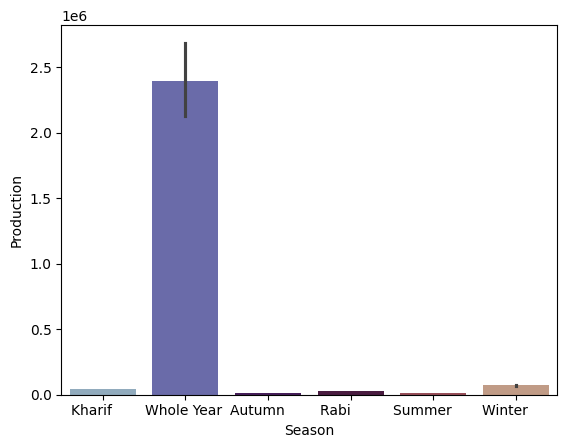

In [22]:
sns.barplot(x='Season', y='Production', data=data,palette='twilight')

In [23]:
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15082, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,2.273756e-07
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00,2.125005e-07
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84,3.618459e-07


<Axes: xlabel='Season', ylabel='Production'>

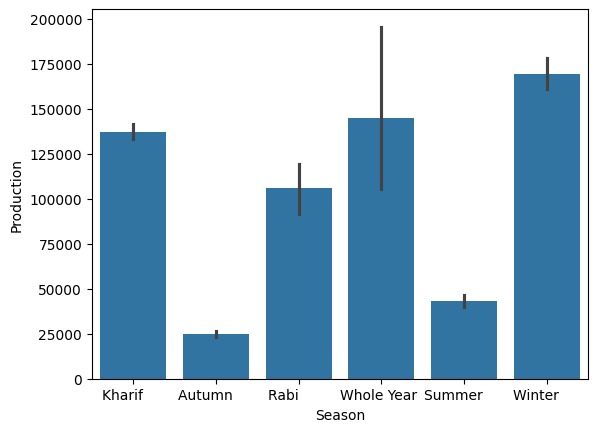

In [25]:
sns.barplot(x="Season",y="Production",data=rice_df)

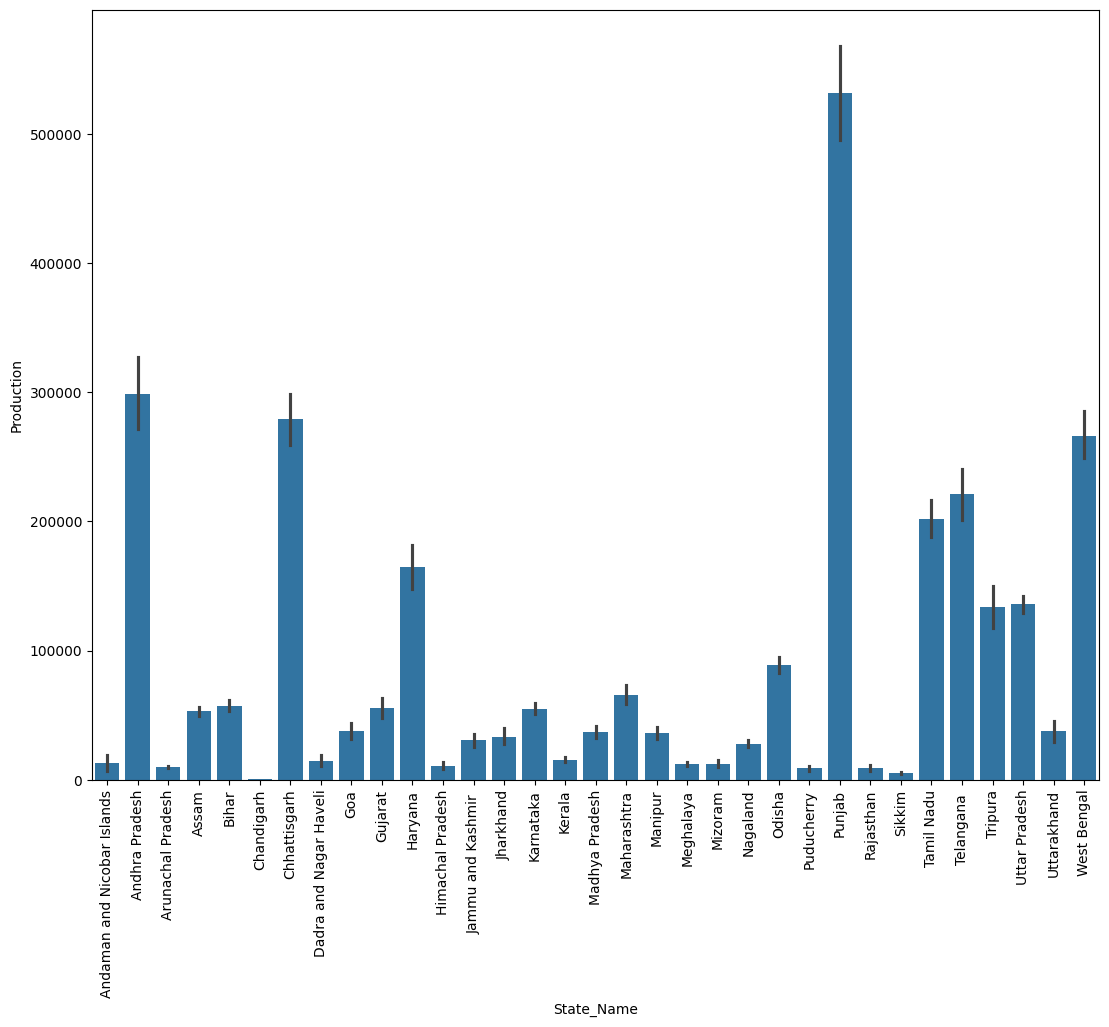

In [27]:
plt.figure(figsize=(13,10))
sns.barplot(x="State_Name",y="Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [28]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

,District_Name,Production,precent_of_pro
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794


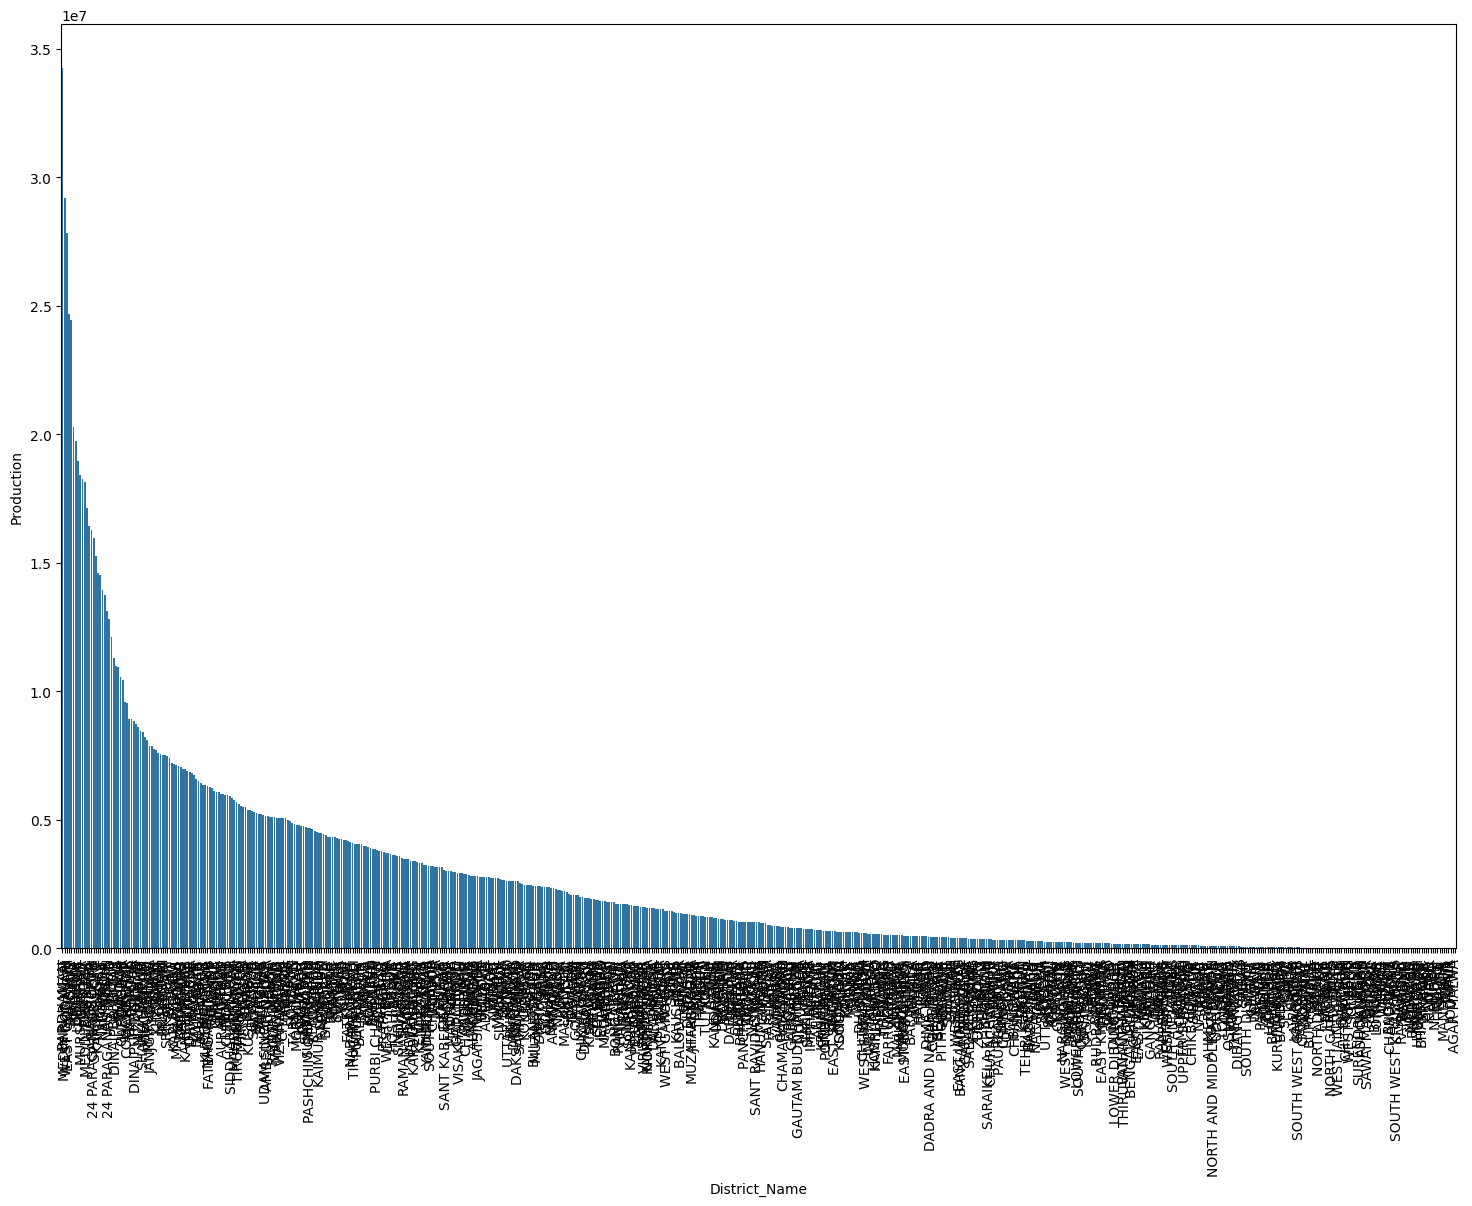

In [29]:
plt.figure(figsize=(18,12))
sns.barplot(x="District_Name",y="Production",data=top_rice_pro_dis)
plt.xticks(rotation=90)
plt.show()

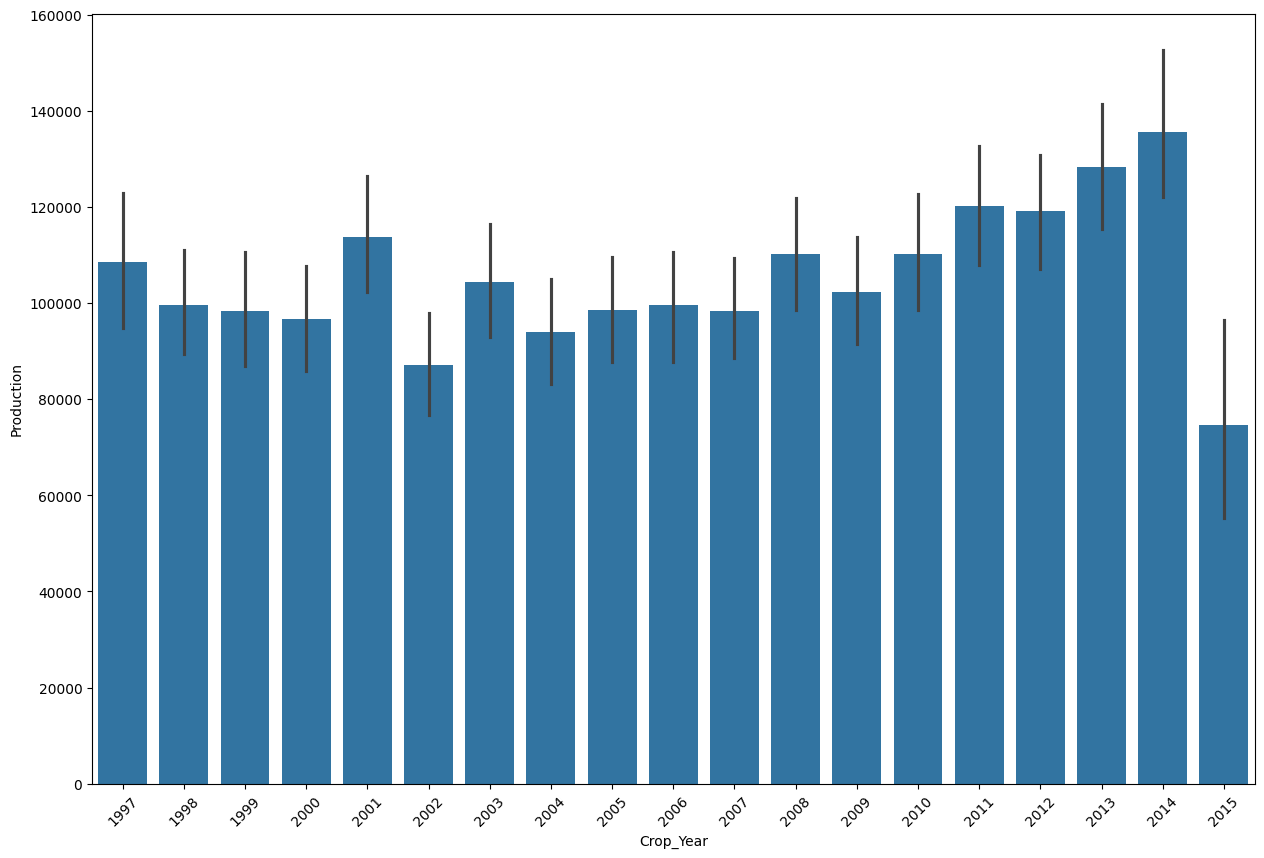

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year",y="Production",data=rice_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

In [32]:
coc_df = data[data["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(1958, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,0.046113
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0,0.045638
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0,0.047806


<Axes: xlabel='Season', ylabel='Production'>

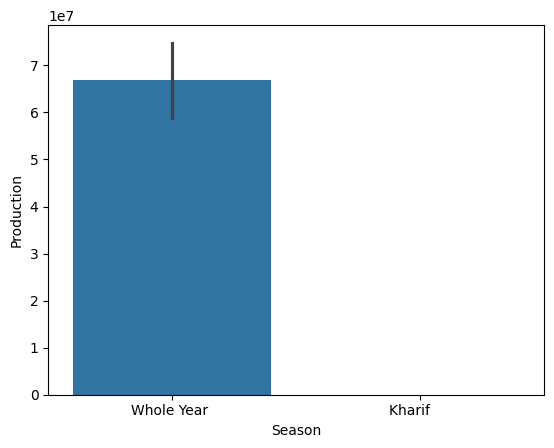

In [33]:
sns.barplot(x="Season",y="Production",data=coc_df)

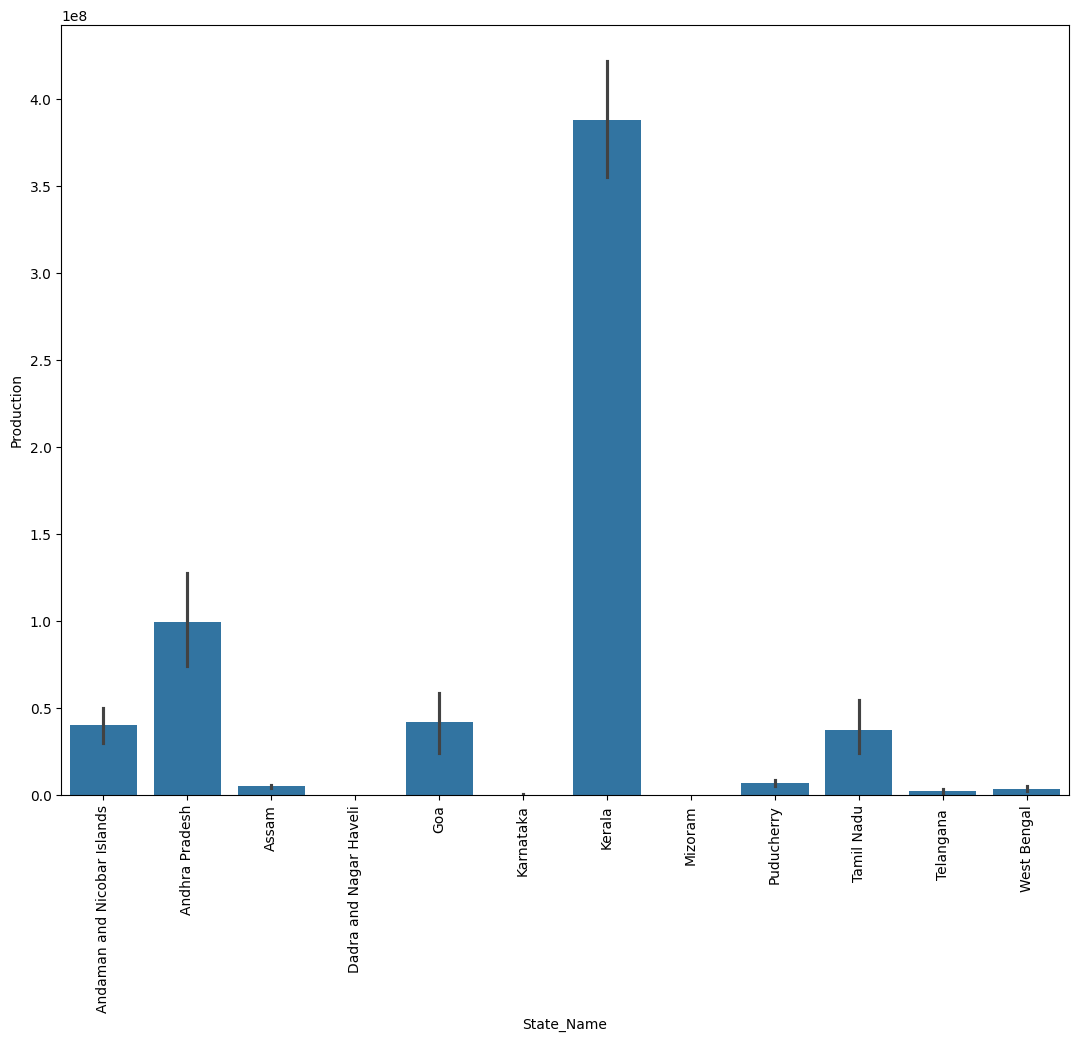

In [34]:
plt.figure(figsize=(13,10))
sns.barplot(x="State_Name",y="Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()

In [35]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379


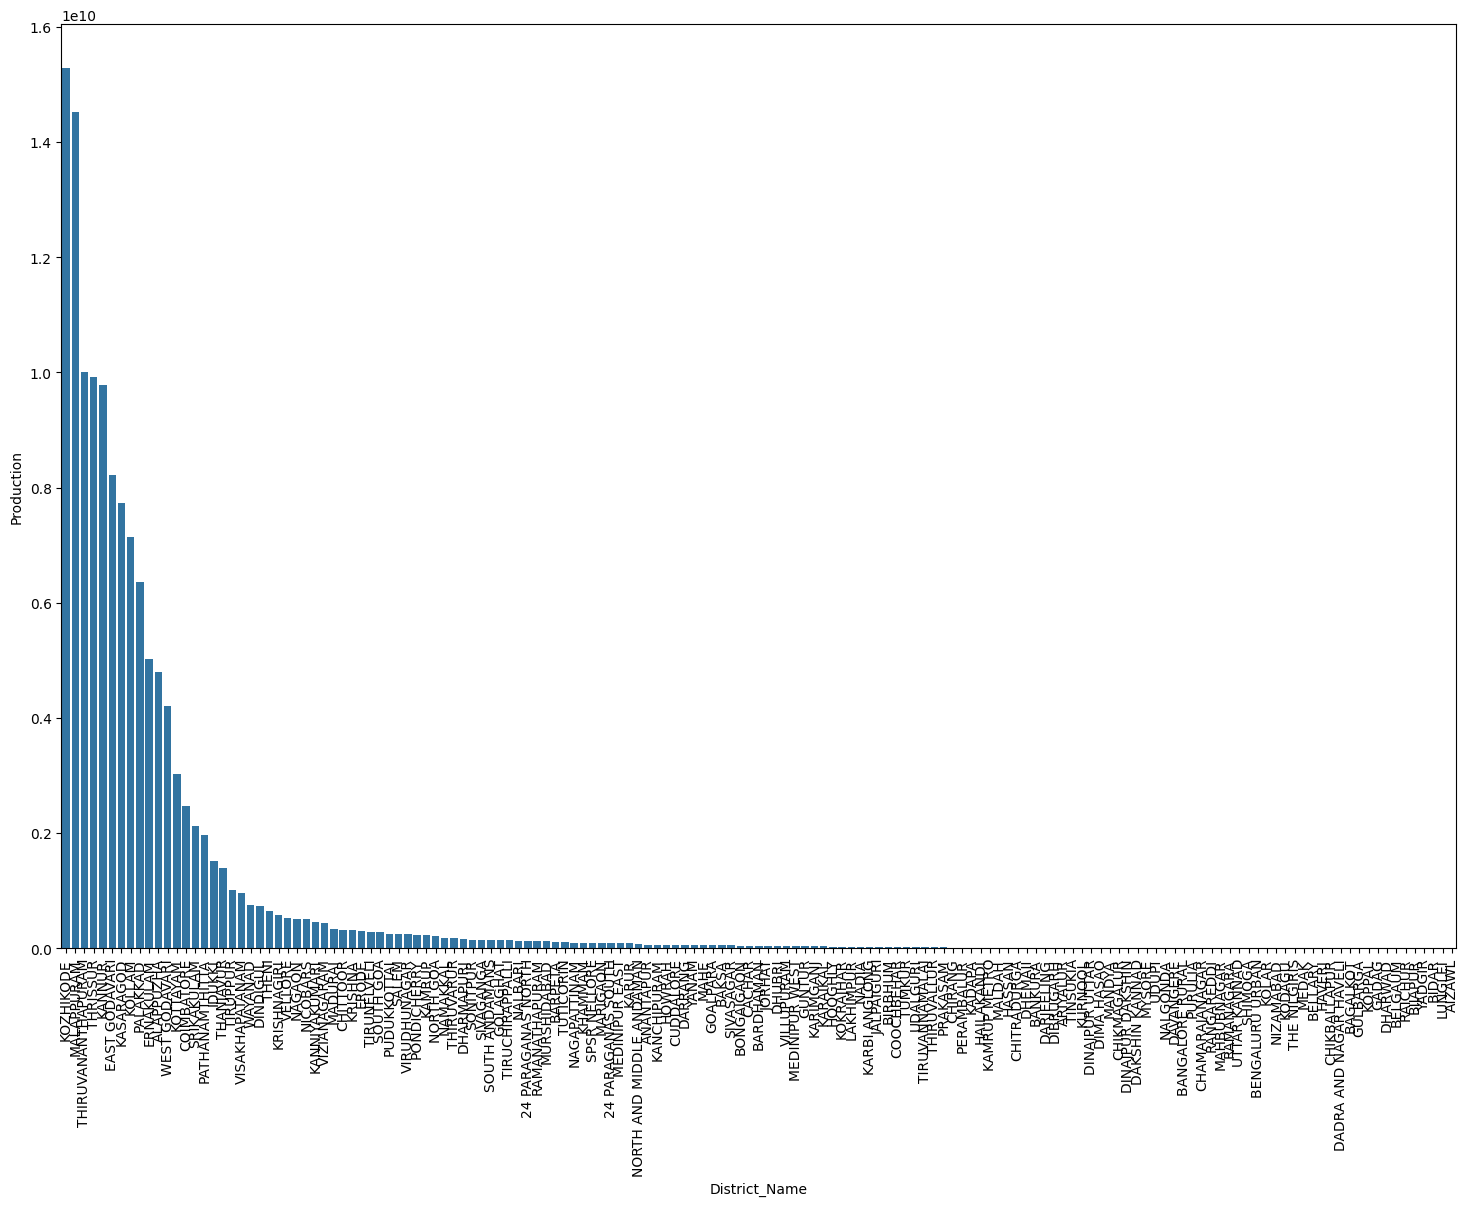

In [37]:
plt.figure(figsize=(18,12))
sns.barplot(x="District_Name",y="Production",data=top_coc_pro_dis)
plt.xticks(rotation=90)
plt.show()

C:\Users\kolla\AppData\Local\Temp\ipykernel_10088\181788453.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Crop_Year",y="Production",data=coc_df,ci=None)


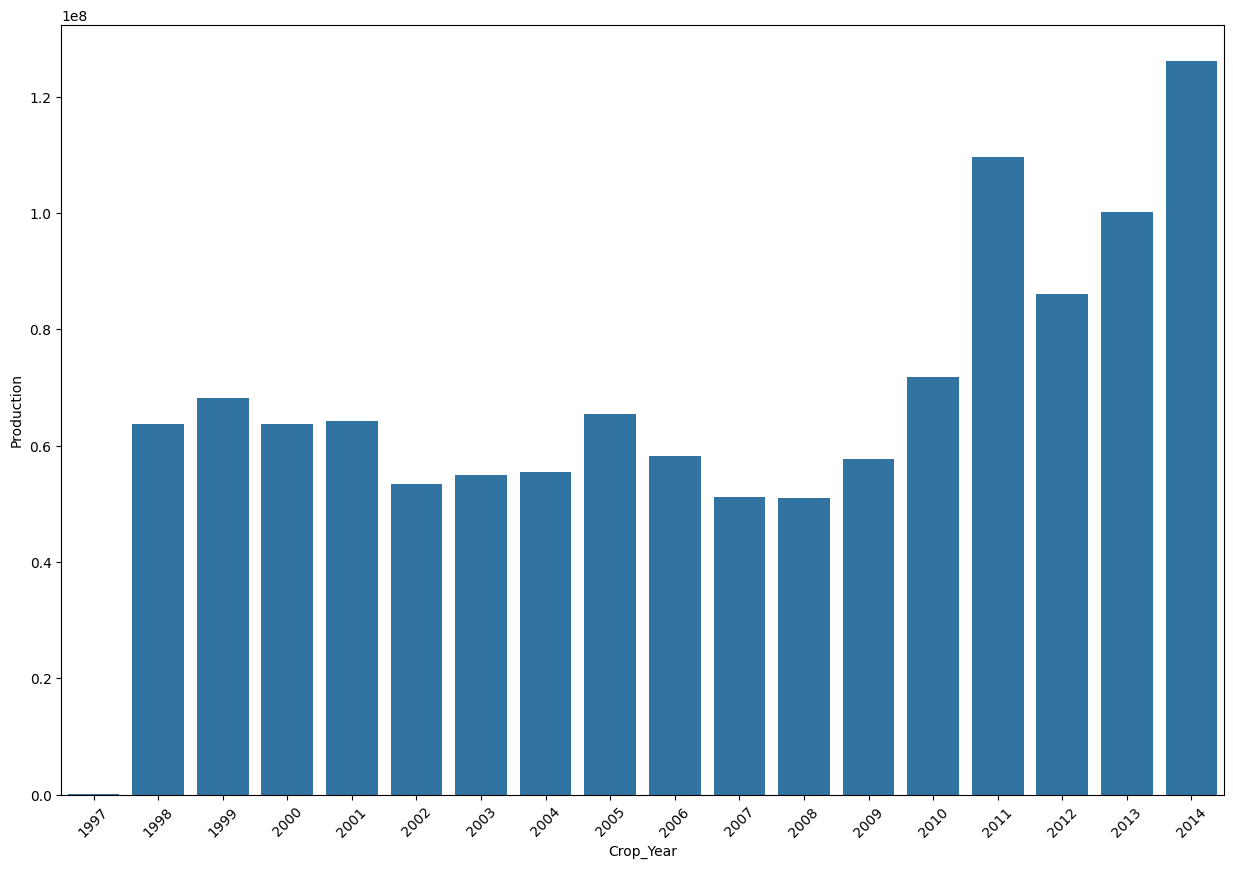

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year",y="Production",data=coc_df,ci=None)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()